In [40]:
import random
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [41]:
class AgentState(TypedDict):
    name: str
    counter: int
    nums: List[int]

In [ ]:
def greeting_node(state: AgentState) -> AgentState:
    """This is the greeting node"""
    state["counter"] = 0
    state["name"] = "Hello, " + state["name"]
    return state

def random_node(state: AgentState) -> AgentState:
    """This is the random node"""
    print("random")
    state["nums"].append(random.randint(0, 100))
    state["counter"] += 1
    return state

def should_continue_node(state: AgentState) -> str:
    """This is the should continue node"""
    if state["counter"] < 5:
        return "yes"
    else:
        return "no"

In [45]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")
graph.set_entry_point("greeting")

graph.add_conditional_edges("random", should_continue_node, {
    "yes": "random",
    "no": END
})

app = graph.compile()


In [44]:
app.invoke({"name": "John", "counter": 0, "nums": []})

Greeting
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue
random
Should continue


GraphRecursionError: Recursion limit of 25 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

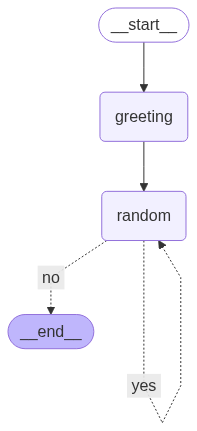

In [46]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))